# Logistic Regression: Objective
The primary objective of this notebook is to build a logistic regression model to predict whether an individual is a smoker based on features like age, sex, BMI, number of children, region, and insurance charges. This involves loading and preprocessing the data, exploratory data analysis, feature encoding, data normalization, model training and evaluation, and making predictions.

# Steps Overview
1. Load the Dataset: Import the necessary libraries and load the dataset to understand its structure.

2. Data Preprocessing:
    * Encode categorical variables to transform non-numeric columns into numerical values.
    * Visualize correlations between features to gain insights.
    
3. Model Building:
    * Split the dataset into features (X) and target (y).
    * Further split the data into training and testing sets.
    * Normalize the feature set to improve model performance.
    * Train a logistic regression model.

4. Model Evaluation:
    * Predict the target variable for the test set.
    * Evaluate the model's performance using accuracy score, confusion matrix, and classification report.

5. Make Predictions: Use the trained model to make predictions on new data.

## Importing libraries and the dataset

In [139]:
# Import Libraries
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#sci-kit learn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load the dataset
file_path = 'insurance.csv'
data = pd.read_csv(file_path)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [140]:
# Display the first 10 few rows of the dataset to understand its structure
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [141]:
# Display unique values in 'region' column to understand its distribution
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Data Preprocessing

In [142]:
## Data Preprocessing
object_columns = data.columns[(data.dtypes == 'object') & (data.columns != 'smoker')]
object_columns

Index(['sex', 'region'], dtype='object')

In [143]:
# Encode categorical features using one-hot encoding for nominal variables
# data = pd.get_dummies(data, columns=object_columns, drop_first=True)
encoder = OneHotEncoder(drop='first')
data_encoded = encoder.fit_transform(data[object_columns]).toarray()

data_encoded_df = pd.DataFrame(
    data_encoded, columns=encoder.get_feature_names_out()
)

data.drop(object_columns, axis=1, inplace=True)

data = pd.concat([data, data_encoded_df], axis=1)

In [144]:
data.head()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,yes,16884.92400,0.0,0.0,0.0,1.0
1,18,33.770,1,no,1725.55230,1.0,0.0,1.0,0.0
2,28,33.000,3,no,4449.46200,1.0,0.0,1.0,0.0
3,33,22.705,0,no,21984.47061,1.0,1.0,0.0,0.0
4,32,28.880,0,no,3866.85520,1.0,1.0,0.0,0.0


In [145]:
# Label encode the target variable 'smoker'
le = LabelEncoder()
data['smoker'] = le.fit_transform(data['smoker'])

In [146]:
data.head()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1725.55230,1.0,0.0,1.0,0.0
2,28,33.000,3,0,4449.46200,1.0,0.0,1.0,0.0
3,33,22.705,0,0,21984.47061,1.0,1.0,0.0,0.0
4,32,28.880,0,0,3866.85520,1.0,1.0,0.0,0.0


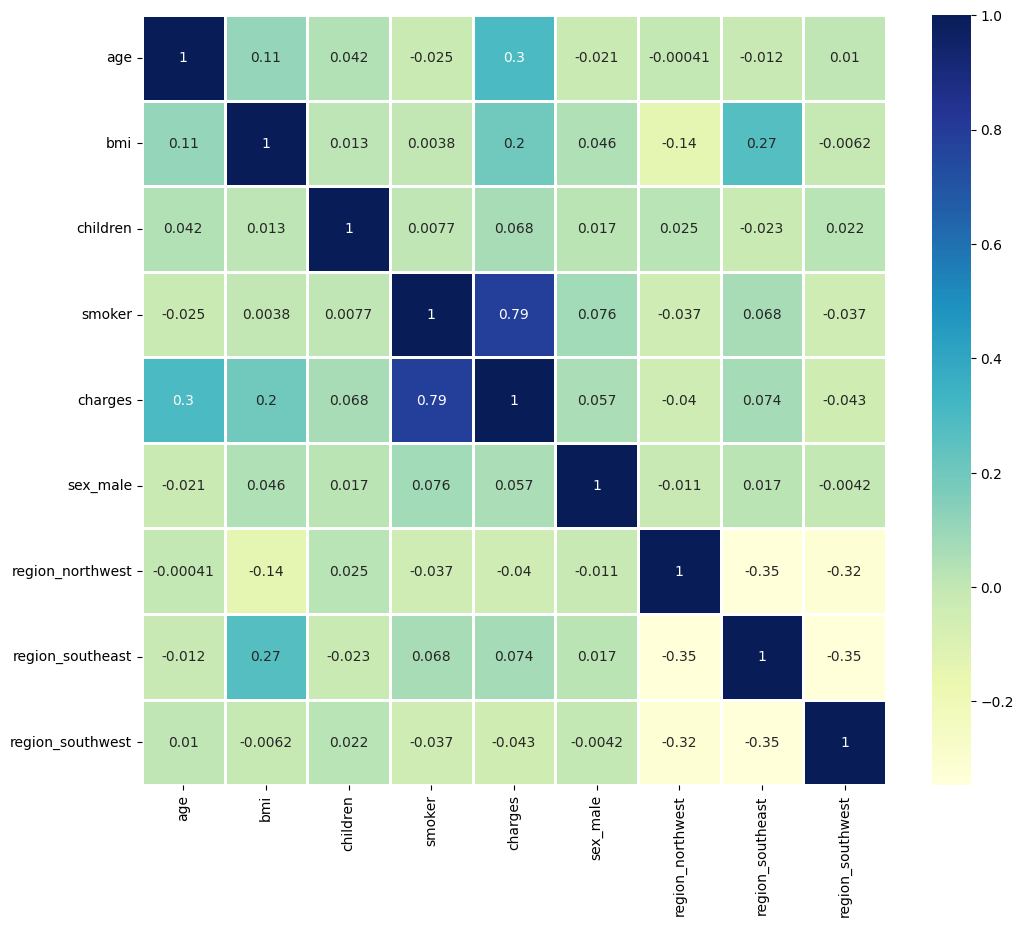

In [147]:
# Plot the heatmap to visualize feature correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', linewidths=2)
plt.show()

As seen from the correlations above, the **smoker** status (*target*) is highly correlated with the feature **charges**.

## Train test split

In [148]:
# Splitting the dataset into features and target
X = data.drop('smoker', axis=1)
y = data['smoker']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Implementing Logistic Regression model

In [149]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic regression model
log_reg = LogisticRegression()

#Fit the logistic regression model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [150]:
# Predict the model
y_pred = log_reg.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0])

## Performance metrics

In [151]:
#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report     , ConfusionMatrixDisplay

print("Accuracy Score:",accuracy_score(y_pred, y_test))
print("Confusion Matrix: \n",confusion_matrix(y_pred, y_test))
print("Classification Report: \n " ,classification_report(y_pred, y_test))

Accuracy Score: 0.8992537313432836
Confusion Matrix: 
 [[210  23]
 [  4  31]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.98      0.90      0.94       233
           1       0.57      0.89      0.70        35

    accuracy                           0.90       268
   macro avg       0.78      0.89      0.82       268
weighted avg       0.93      0.90      0.91       268



In [152]:
accuracy_score(y_pred, y_test)

0.8992537313432836

[[210  23]
 [  4  31]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       233
           1       0.57      0.89      0.70        35

    accuracy                           0.90       268
   macro avg       0.78      0.89      0.82       268
weighted avg       0.93      0.90      0.91       268



<Figure size 5000x1500 with 0 Axes>

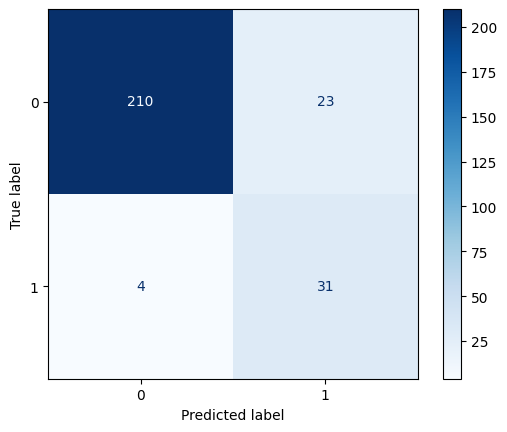

In [153]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test,labels=log_reg.classes_)
# sns.heatmap can also be used to get the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
plt.figure(figsize=(50, 15))
disp.plot(cmap='Blues')


#plt.xlabel('Predicted')
#plt.ylabel('Truth')


Making Predictions: Finally, the trained model is used to make predictions on new data. This step demonstrates how the model can be applied to predict the smoking status of individuals based on their features.



In [134]:
X_train.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

You will notice that the only variable that really influences the output is **charges** (which makes sense since it is so correlated). Changing the other variables has very little effect.

In [138]:
# predict only on a single row, provide X in order of ['age', 'bmi', 'children', 'charges', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest']
log_reg.predict(scaler.transform([[0, 20, 5, 100000, 1, 1, 0, 0]]))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [132]:
accuracy_Score_logistic = accuracy_score(y_test, y_pred)
print('LogisticRegression model accuracy is: {:.2f}%'.format(accuracy_Score_logistic*100))

LogisticRegression model accuracy is: 96.64%
